# day 30

In [1]:
import pandas as pd

In [2]:
import numpy  as np

In [7]:
df = pd.read_csv("furniture_data.csv")

In [8]:
df

,Product,Sale Price,Cost per Product,Quantity,Total Revenue
0,Sofa,800,600,32,25600
1,Chair,300,200,12,3600
2,Table,500,300,41,20500
3,Bed,1000,700,23,23000
4,Wardrobe,800,600,19,15200
5,Dresser,600,500,33,19800
6,Bookshelf,400,300,10,4000
7,Ottoman,200,100,13,2600
8,Coffee Table,250,150,14,3500
9,Rug,150,75,11,1650


In [11]:
dupli = df["Product"].duplicated()

In [14]:
df[dupli]

,Product,Sale Price,Cost per Product,Quantity,Total Revenue
10,Wardrobe,800,600,13,10400
11,Dresser,600,500,56,33600
12,Bookshelf,400,300,15,6000
13,Ottoman,200,100,17,3400
14,Coffee Table,250,150,10,2500
15,Rug,150,75,14,2100


In [20]:
pro_count = df.pivot_table(index = "Product",
                           aggfunc = 'size')

In [21]:
pro_count

Product
Bed             1
Bookshelf       2
Chair           1
Coffee Table    2
Dresser         2
Ottoman         2
Rug             2
Sofa            1
Table           1
Wardrobe        2
dtype: int64

In [22]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

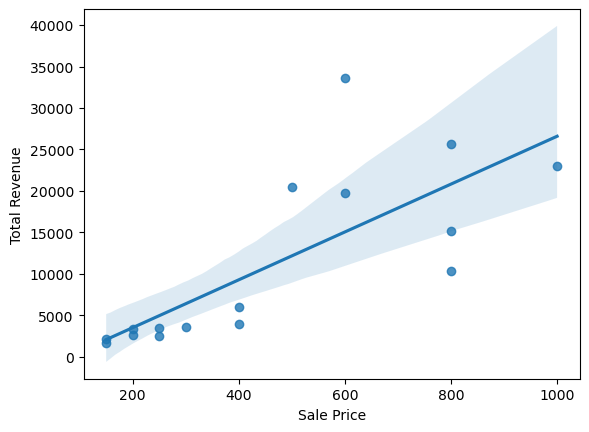

In [24]:
sns.regplot(x = "Sale Price", y = "Total Revenue", data = df)
plt.show()

In [33]:
wear_bed = ["Wardrobe","Bed"]
a = df.query("Product == @wear_bed")

In [44]:
b = a.groupby("Product")["Total Revenue"].sum()
b

Product
Bed         23000
Wardrobe    25600
Name: Total Revenue, dtype: int64

In [45]:
b["Bed"]

23000

In [46]:
res = abs(b["Bed"] - b["Wardrobe"])

In [47]:
res

2600

In [48]:
df

,Product,Sale Price,Cost per Product,Quantity,Total Revenue
0,Sofa,800,600,32,25600
1,Chair,300,200,12,3600
2,Table,500,300,41,20500
3,Bed,1000,700,23,23000
4,Wardrobe,800,600,19,15200
5,Dresser,600,500,33,19800
6,Bookshelf,400,300,10,4000
7,Ottoman,200,100,13,2600
8,Coffee Table,250,150,14,3500
9,Rug,150,75,11,1650


In [50]:
df.insert(4, "Total Cost", df["Cost per Product"]* df["Quantity"])

In [52]:
df.insert(5, "Total Sale", df["Sale Price"]* df["Quantity"])

In [54]:
df.insert(6, "Profit", df["Total Sale"] - df["Total Cost"])

In [61]:
df["Profit Margin"]=df["Profit Margin"]*100

In [63]:
df.loc[df["Profit Margin"] == df["Profit Margin"].min(), "Product"]

5     Dresser
11    Dresser
Name: Product, dtype: object